In [1]:
%matplotlib inline


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import pandas as pd
import anndata as ad
import scanpy as sc
import matplotlib
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

-----
anndata     0.7.6
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 7.2.0
anndata             0.7.6
appnope             0.1.0
backcall            0.2.0
cairo               1.19.1
cffi                1.14.1
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
future_fstrings     NA
get_version         2.1
h5py                2.10.0
igraph              0.8.2
ipykernel           5.3.4
ipython_genutils    0.2.0
jedi                0.17.2
joblib              0.16.0
kiwisolver          1.2.0
legacy_api_wrap     1.2
leidenalg           0.8.3
llvmlite            0.34.0
louvain             0.7.0
matplotlib          3.3.1
mpl_toolkits        NA
natsort             7.0.1
numba               0.51.1
numexpr             2.7.1
numpy               1.19.4
packaging           20.4
pandas              1.2.4
parso               0.7.1
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt

In [6]:
import os
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Cell_Competition/Cell_Competition_Github/Input_data_Paper_Figures')

In [7]:
adata = ad.read_text("data_raw.txt").T
metadata = pd.read_csv('meta_all.txt', sep=" ",dtype="category")

In [8]:
adata

AnnData object with n_obs × n_vars = 723 × 37351

In [9]:
adata.obs['cell_name']=list(metadata['cell_name'])
adata.obs['orig_cluster'] = list(metadata['nomi_cluster'])

In [10]:
len(adata.obs['cell_name'])

723

In [11]:
adata.X = adata.X.astype('float64') 

In [12]:
sc.pp.recipe_zheng17(adata)
sc.tl.pca(adata, svd_solver='arpack')

running recipe zheng17
filtered out 2354 genes that are detected in less than 1 counts
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
    finished (0:00:01)
computing PCA
    with n_comps=50
    finished (0:00:00)


In [13]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.draw_graph(adata)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:00:00)


In [14]:
sc.tl.paga(adata,groups='orig_cluster')

... storing 'orig_cluster' as categorical


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


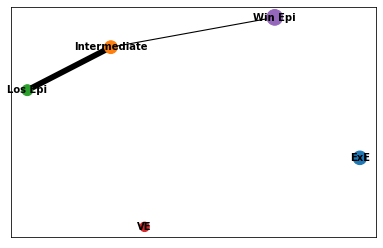

In [15]:
sc.pl.paga(adata,color=['orig_cluster'],threshold=0.1)